In [112]:
#https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/deepdream/deepdream.ipynb
#https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/02_Convolutional_Neural_Network.ipynb
import matplotlib.pyplot as plt
from scipy import misc

In [18]:
def plot_image(image):
    plt.imshow(image.reshape(img_shape),
               interpolation='nearest',
               cmap='binary')
    
#    plt.imshow(image)
#    plt.show()

def plot_images(images, cls_true, cls_pred=None):
    #assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(2,4)
    fig.subplots_adjust(hspace=0.2, wspace=0.2)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [232]:
imgPath = "./dataset/poster_image/new/"
labelPath = "./dataset/MovieGenre_fix_leekeon_total.csv"
img_shape  = (268, 182, 3)

In [233]:
testImage1 = "./dataset/poster_image/new/2267454.jpg"
testImage2 = "./dataset/poster_image/new/45229.jpg"
testImage3 = "./dataset/poster_image/new/762107.jpg"
testImage4 = "./dataset/poster_image/new/996948.jpg"
testImage5 = "./dataset/poster_image/new/1368491.jpg"
testImage6 = "./dataset/poster_image/new/2852458.jpg"
testImage7 = "./dataset/poster_image/new/3619102.jpg"
testImage8 = "./dataset/poster_image/new/452598.jpg"
testImage9 = "./dataset/poster_image/new/365089.jpg"

In [234]:
images = []

In [235]:
images.append(misc.imread(testImage1))
images.append(misc.imread(testImage2))
images.append(misc.imread(testImage3))
images.append(misc.imread(testImage4))
images.append(misc.imread(testImage5))
images.append(misc.imread(testImage6))
images.append(misc.imread(testImage7))
images.append(misc.imread(testImage8))

/etc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/etc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/etc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/etc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after remov

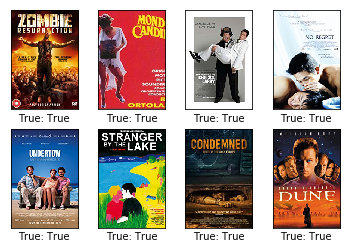

In [236]:
cls_true = ['True','True','True','True','True','True','True','True']
plot_images(images, cls_true)

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "2"

import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import misc

from genre_data_loader import movie_data
data = movie_data()

def initialize_session():
    config = tf.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 0.4
    return tf.Session(config=config)

##################################################
BATCH_SIZE = 16
class_size = 4
learning_rate = 0.001   # Learning rate
use_clip = True         # Gradient clipping 쓸지 여부
train_keep_prob = 0.7
train_total_batch = int(data.train_size / BATCH_SIZE)
test_total_batch = int(data.test_size / BATCH_SIZE)
train_acc_summary = [] # 학습용 데이터의 정확도를 중간 중간 기록한다
test_acc_summary = []  # 테스트용 데이터의 정확도를 중간 중간 기록한다
train_loss_summary = [] # 학습용 데이터의 정확도를 중간 중간 기록한다
test_loss_summary = []  # 테스트용 데이터의 정확도를 중간 중간 기록한다
hypothesis_summary = []
##################################################

imgPath = "./dataset/poster_image/new/"
img_shape  = (268, 182, 3)

from genre_model_resnet_style import Model
model = Model(use_clip=use_clip, class_size=class_size, learning_rate=learning_rate)

sess = initialize_session()
sess.run(tf.global_variables_initializer())

/etc/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


x_train size 4800
y_train size 4800
x_test  size 1200
y_test  size 1200
conv1 Tensor("MaxPool:0", shape=(?, 67, 45, 64), dtype=float32)
conv2 Tensor("dropout/mul:0", shape=(?, 33, 22, 128), dtype=float32)
conv3 Tensor("dropout_1/mul:0", shape=(?, 16, 11, 256), dtype=float32)
x_image Tensor("Mean:0", shape=(?, 256), dtype=float32)


In [2]:
model.restore(sess)

 - Restoring variables...
Instructions for updating:
Please use tf.global_variables instead.
INFO:tensorflow:Restoring parameters from models/model
 * model restored 


In [3]:
def test_model():
    test_loss, test_acc = 0, 0

    for _ in range(test_total_batch):
        test_x, test_y = data.get_test(BATCH_SIZE)
        
        loss, acc = sess.run([model.loss, model.accuracy],
                              feed_dict={model.x_image: test_x, model.y_label: test_y, model.keep_prob : 1.0, model.is_training:False})
        test_loss += loss
        test_acc += acc
        
    return test_loss/test_total_batch, test_acc/test_total_batch

In [4]:
#test_avg_loss, test_avg_acc = test_model()

In [26]:
test_x, test_y = data.get_test(25)
test_id = data.get_test_ids(25)

In [27]:
test_id[0]

2825768

./dataset/poster_image/new/2825768.jpg


/etc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


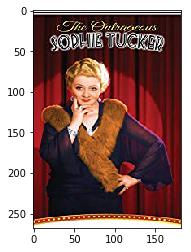

In [28]:
from scipy import misc
print(imgPath+str(test_id[0])+'.jpg')
img = misc.imread(imgPath+str(test_id[0])+'.jpg')
plt.imshow(img)
plt.show()

In [29]:
def plot_conv_layer(layer, image):
    # Assume layer is a TensorFlow op that outputs a 4-dim tensor
    # which is the output of a convolutional layer,
    # e.g. layer_conv1 or layer_conv2.

    # Create a feed-dict containing just one image.
    # Note that we don't need to feed y_true because it is
    # not used in this calculation.
    #feed_dict = {x: [image]}

    # Calculate and retrieve the output values of the layer
    # when inputting that image.
    #values = session.run(layer, feed_dict=feed_dict)
    plt.figure(figsize=(200, 100))
    values = layer
    # Number of filters used in the conv. layer.
    num_filters = values.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids, figsize=(20, 20))

    # Plot the output images of all the filters.
    for i, ax in enumerate(axes.flat):
        # Only plot the images for valid filters.
        if i<num_filters:
            # Get the output image of using the i'th filter.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = values[0, :, :, i]

            # Plot image.
            ax.imshow(img, interpolation='nearest', cmap='binary')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [30]:
con_l1,con_l2,con_l3 = sess.run([model.con1,model.con2,model.con3], feed_dict={model.x_image: test_x, model.y_label: test_y, model.keep_prob : 1.0, model.is_training:False})

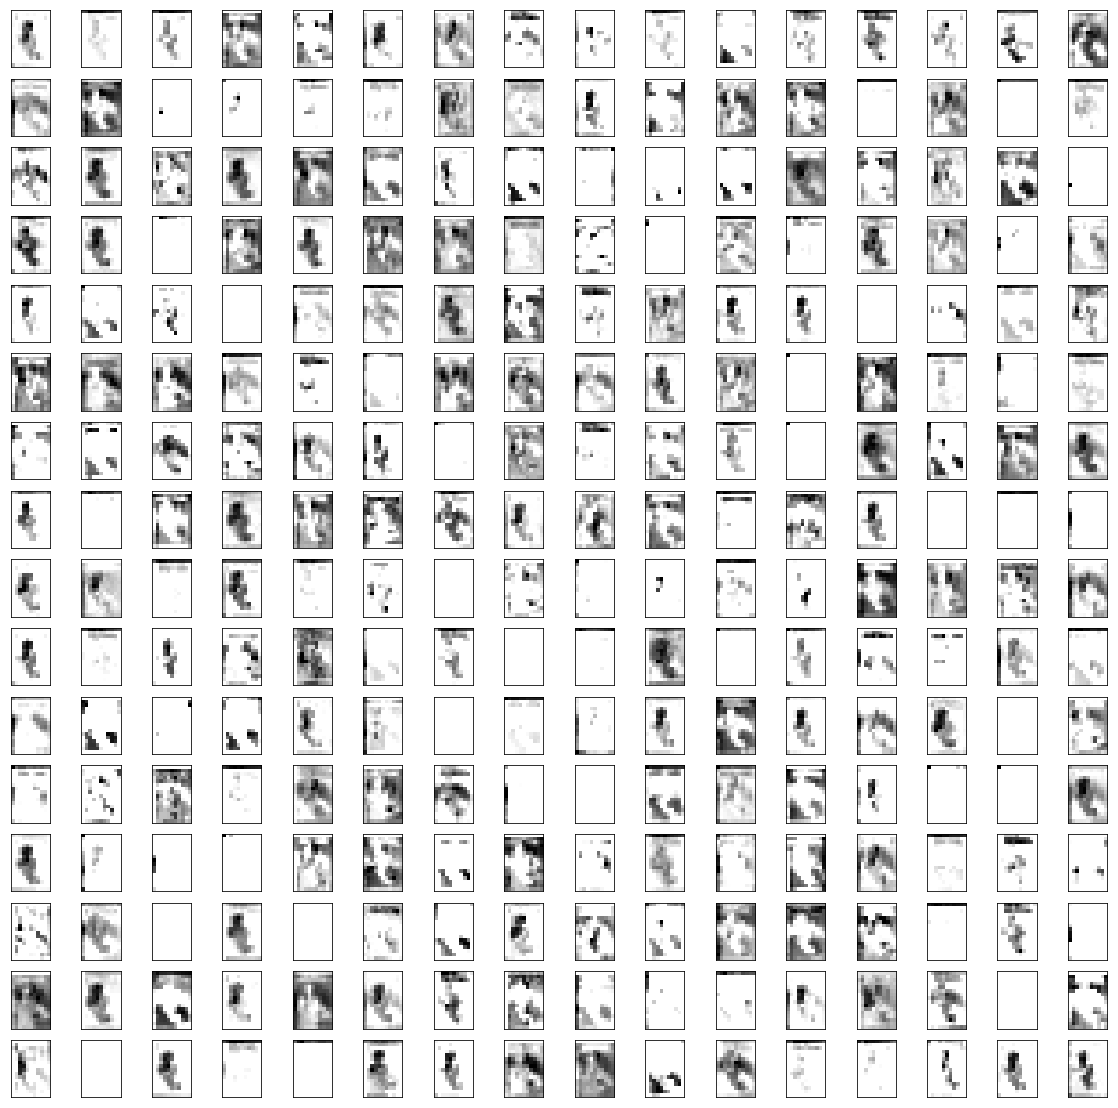

In [31]:
import math
import matplotlib.pyplot as plt
#plot_conv_layer(con_l1,test_x)
#plot_conv_layer(con_l2,test_x)
plot_conv_layer(con_l3,test_x)